# Hyperparameter Tuning with Python

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Datasets

* Diabetes
* Heart Failure
* FB Live
* Telco Churn (assignment)

In [ ]:
# load datasets
telco = pd.read_csv('churn.csv')

In [ ]:
# show first 5 columns of data
# data dictionary can be found at 
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
telco.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#data description
telco.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7034.000000,7029.000000,7036.000000,7046.000000
mean,0.162354,32.412150,64.800391,2281.921636
std,0.368802,24.546806,30.070620,2265.653438
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,401.350000
50%,0.000000,29.000000,70.350000,1397.100000
75%,0.000000,55.000000,89.850000,3791.000000
max,1.000000,72.000000,118.750000,8684.800000


Observation:

1. Senior citizen consist of two value, 0 and 1
2. The averge of Tenure is 32.422 with minimum value 1 and max value 72
3. The average of Monthly Charges is 64.82, wit min value 18.25 and max value 118.75
4. The average of Total Charges is 2284.64

# **Basic Data Cleaning**

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


There are missing value on almost all column

In [ ]:
# number of missing values per column
telco.isna().sum()

customerID           9
Gender              16
SeniorCitizen       12
Partner             16
Dependents          19
Tenure              17
Contract            13
PaperlessBilling    13
PaymentMethod       11
MonthlyCharges      10
TotalCharges         0
Churn                0
dtype: int64

To handling missing value, i decide to drop them

In [ ]:
telco1 = telco.dropna().reset_index(drop=True)

In [ ]:
telco1.isna().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data is clean

In [ ]:
telco1.describe(include='object')

,customerID,Gender,Partner,Dependents,Contract,PaperlessBilling,PaymentMethod,Churn
count,6911,6911,6911,6911,6911,6911,6911,6911
unique,6898,2,2,2,3,2,4,2
top,2905-KFQUV,Male,No,No,Month-to-month,Yes,Electronic check,No
freq,2,3495,3581,4857,3810,4096,2315,5083


In [ ]:
#check duplicated value
duplicatesN = telco1[telco1.duplicated()]['customerID'].count()
print(f"Number of duplicated entries: {duplicatesN}")

Number of duplicated entries: 13


In [ ]:
#drop customerID column because it has no meaningful value
data= telco1.drop('customerID',axis=1)
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
1,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
2,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
4,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


# **Split Data**

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = data.drop(columns='Churn')
target = data[['Churn']]

feature_data_train, feature_data_test, target_data_train, target_data_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_data_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


TypeError: ignored

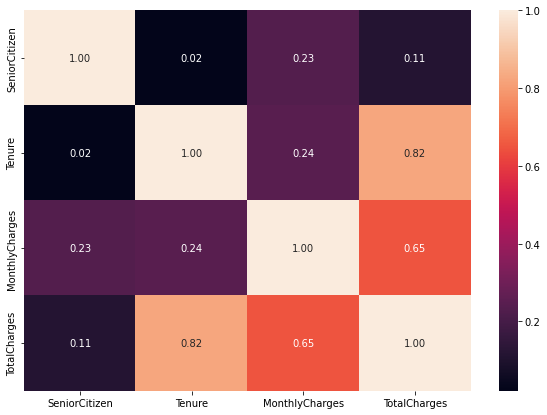

In [ ]:
# heatmap correlation
data_train = pd.concat([feature_data_train, target_data_train], axis=1)
corr = data_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Tenure and Total charges is highly correlated becaues ot has correlation value more than 0.80

# **Handle Categorical data**

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['Gender'] = [1 if x == 'Male' else 2 for x in data['Gender']]

In [ ]:
data['Partner'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Partner'] = [0 if x == 'No' else 1 for x in data['Partner']]

In [ ]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Dependents'] = [0 if x == 'No' else 1 for x in data['Dependents']]

In [ ]:
data['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [ ]:
data['Contract'] = [1 if x == 'Month-to-month' else (2 if x == 'One year' else 3) for x in data['Contract']]

In [ ]:
data['PaymentMethod'].unique()

array(['Mailed check', 'Bank transfer (automatic)', 'Electronic check',
       'Credit card (automatic)'], dtype=object)

In [ ]:
data['PaymentMethod'] = [1 if x == 'Mailed check' else (2 if x == 'Bank transfer (automatic)' else (3 if x=='Electronic check' else 4))for x in data['PaymentMethod']]

In [ ]:
data['PaperlessBilling'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['PaperlessBilling'] = [0 if x == 'No' else 1 for x in data['PaperlessBilling']]

In [ ]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Churn'] = [0 if x == 'No' else 1 for x in data['Churn']]

# K-NN Classification

In [ ]:
# will use this dataset
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0.0,0,0,34.0,2,0,1,56.95,1889.50,0
1,1,0.0,0,0,2.0,1,1,1,53.85,108.15,1
2,1,0.0,0,0,45.0,2,0,2,42.30,1840.75,0
3,2,0.0,0,0,2.0,1,1,3,70.70,151.65,1
4,2,0.0,0,0,8.0,1,1,3,99.65,820.50,1


In [ ]:
# split the data 
from sklearn.model_selection import train_test_split

X = data.drop(columns='Churn').to_numpy()
y = data[['Churn']].to_numpy()
y = y.reshape(len(y),) # sklean formatting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# It's important to choose the right metric when doing classification
data['Churn'].value_counts()

0    5083
1    1828
Name: Churn, dtype: int64

The class distribution is IMBALANCE, so need NOT to use `accuracy`. Use `recall` (sensitivity) instead! DEATH is the most expensive thing to incure!

In [ ]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.284084,7
1,{'n_neighbors': 3},0.459831,1
2,{'n_neighbors': 4},0.338560,6
3,{'n_neighbors': 5},0.438030,3
4,{'n_neighbors': 6},0.359669,5
5,{'n_neighbors': 7},0.445506,2
6,{'n_neighbors': 8},0.361693,4


In [ ]:
# what if we also want to tune "weights" hyperparameter
# "uniform": all K neighbors have the same influence
# "distance": closer neighbor in those K neighbors has stronger influence
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.495268,1
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.468689,2
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.468013,3
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.459831,4
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.457122,5
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.457120,6
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.450298,7
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.450289,8
10,"{'n_neighbors': 7, 'weights': 'uniform'}",0.445506,9
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.438030,10


It seems that the recall is uniformly low... It suggests that K-NN model may underfit the data. Will try to use Random Forest later in below.

### Evaluation metrics on test data

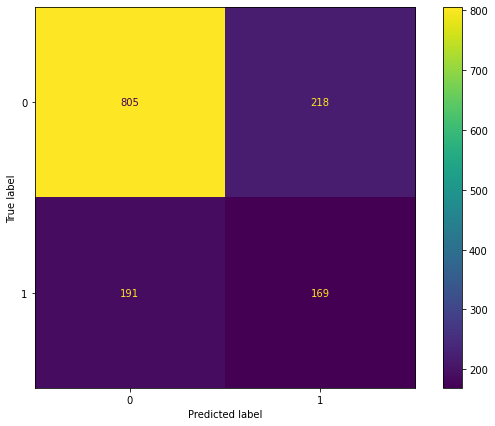

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1023
           1       0.44      0.47      0.45       360

    accuracy                           0.70      1383
   macro avg       0.62      0.63      0.62      1383
weighted avg       0.71      0.70      0.71      1383




<br>
Finding: Our model is not that good. The recall score on test data is only 0.47.

**Random Forest**

In [ ]:
# the usual splitting 
from sklearn.model_selection import train_test_split

X = data.drop(columns='Churn').to_numpy()
y = data[['Churn']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 11.7 s, sys: 401 µs, total: 11.7 s
Wall time: 11.7 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

It takes > 5 seconds to finish

In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'max_depth': 5, 'n_estimators': 10}",0.434601,1
21,"{'max_depth': 5, 'n_estimators': 20}",0.425753,2
23,"{'max_depth': 5, 'n_estimators': 40}",0.425070,3
24,"{'max_depth': 5, 'n_estimators': 50}",0.423705,4
22,"{'max_depth': 5, 'n_estimators': 30}",0.421667,5
19,"{'max_depth': 4, 'n_estimators': 50}",0.388277,6
18,"{'max_depth': 4, 'n_estimators': 40}",0.387593,7
17,"{'max_depth': 4, 'n_estimators': 30}",0.375329,8
16,"{'max_depth': 4, 'n_estimators': 20}",0.371245,9
15,"{'max_depth': 4, 'n_estimators': 10}",0.349442,10


If we want to speed up the training process, we may use RandomizedSearchCV

In [ ]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 5 s, sys: 0 ns, total: 5 s
Wall time: 5 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5),
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='recall')

Now it only takes way less seconds (compared to >5 seconds when using the full GridSearchCV)

In [ ]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'n_estimators': 40, 'max_depth': 5}",0.425070,1
1,"{'n_estimators': 50, 'max_depth': 4}",0.388277,2
0,"{'n_estimators': 40, 'max_depth': 4}",0.387593,3
5,"{'n_estimators': 30, 'max_depth': 4}",0.375329,4
3,"{'n_estimators': 20, 'max_depth': 4}",0.371245,5
2,"{'n_estimators': 10, 'max_depth': 4}",0.349442,6
6,"{'n_estimators': 10, 'max_depth': 3}",0.317432,7
7,"{'n_estimators': 30, 'max_depth': 3}",0.290172,8
9,"{'n_estimators': 20, 'max_depth': 2}",0.111678,9
8,"{'n_estimators': 40, 'max_depth': 1}",0.000000,10


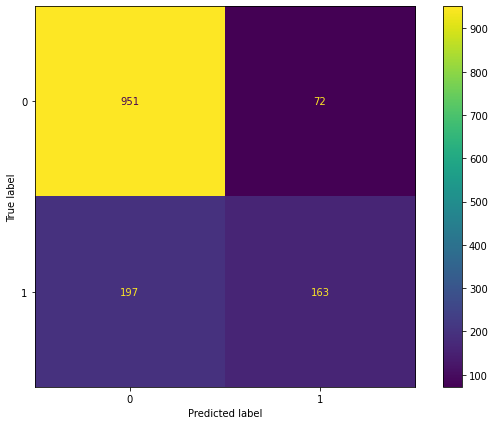

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1023
           1       0.68      0.49      0.57       360

    accuracy                           0.81      1383
   macro avg       0.76      0.70      0.72      1383
weighted avg       0.79      0.81      0.79      1383



Better than our previous K-NN model. But the difference is not that much